<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime

In [90]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [91]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


- Data Cleaning

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [93]:
df = df.drop("director", axis=1)
df = df.dropna()
print(len(df))

6643


In [94]:
#Unique Values
print("show_id:", len(np.unique(df["show_id"])))
print("type:", len(np.unique(df["type"])))
print("title:", len(np.unique(df["title"])))
print("cast:", len(np.unique(df["cast"])))
print("country:", len(np.unique(df["country"])))
print("date_added:", len(np.unique(df["date_added"])))
print("release_year:", len(np.unique(df["release_year"])))
print("rating:", len(np.unique(df["rating"])))
print("duration:", len(np.unique(df["duration"])))
print("listed_in:", len(np.unique(df["listed_in"])))
print("description:", len(np.unique(df["description"])))

show_id: 6643
type: 2
title: 6643
cast: 6464
country: 626
date_added: 1494
release_year: 71
rating: 14
duration: 203
listed_in: 474
description: 6637


In [95]:
print(df["type"].value_counts(), "\n")
print("Number of Unique values: ", len(np.unique(df["type"])))

type
Movie      4761
TV Show    1882
Name: count, dtype: int64 

Number of Unique values:  2


- Feature Engineering

In [96]:
genre_mapping = {
    "Action & Adventure": "Action & Adventure",
    "TV Action & Adventure": "Action & Adventure",
    "Thrillers": "Action & Adventure",
    "TV Thrillers": "Action & Adventure",
    "Dramas": "Drama",
    "TV Dramas": "Drama",
    "Crime TV Shows": "Drama",
    "TV Mysteries": "Drama",
    "TV Horror": "Drama",
    "TV Thrillers": "Drama",
    "Comedies": "Comedy",
    "TV Comedies": "Comedy",
    "Stand-Up Comedy": "Comedy",
    "Stand-Up Comedy & Talk Shows": "Comedy",
    "Sci-Fi & Fantasy": "Science Fiction & Fantasy",
    "TV Sci-Fi & Fantasy": "Science Fiction & Fantasy",
    "Anime Features": "Science Fiction & Fantasy",
    "Anime Series": "Science Fiction & Fantasy",
    "Children & Family Movies": "Family & Children",
    "Kids' TV": "Family & Children",
    "Family-friendly": "Family & Children",
    "Teen TV Shows": "Family & Children",
    "Romantic Movies": "Romance",
    "Romantic TV Shows": "Romance",
    "International Movies": "International Content",
    "International TV Shows": "International Content",
    "Spanish-Language TV Shows": "International Content",
    "Korean TV Shows": "International Content",
    "British TV Shows": "International Content",
    "Horror Movies": "Horror",
    "TV Horror": "Horror",
    "Documentaries": "Documentary",
    "Docuseries": "Documentary",
    "Science & Nature TV": "Documentary",
    "Music & Musicals": "Music & Performing Arts",
    "Reality TV": "Reality & Non-Fiction",
    "TV Shows": "Reality & Non-Fiction",
    "Classic Movies": "Cult & Classic",
    "Classic & Cult TV": "Cult & Classic",
    "Cult Movies": "Cult & Classic",
    "Independent Movies": "Independent & Niche",
    "LGBTQ Movies": "Independent & Niche",
    "Faith & Spirituality": "Independent & Niche",
    "Movies": "Independent & Niche",
    "Sports Movies": "Sports",
}

In [97]:
def categorize_rating(rating):
    if rating in ["TV-G", "G", "TV-Y", "TV-Y7", "TV-Y7-FV"]:
        return "Family-friendly"
    elif rating in ["TV-PG", "PG", "PG-13", "TV-14"]:
        return "Parental Guidance"
    elif rating in ["TV-MA", "R", "NC-17"]:
        return "Mature"
    elif rating in ["NR", "UR"]:
        return "Not Rated/Unrated"
    else:
        return "Unknown"

def map_genres_to_broad(genres):
    broad_genres = set()  # Use set to avoid duplicates
    for genre in genres:
        broad_genre = genre_mapping.get(genre)
        if broad_genre:
            broad_genres.add(broad_genre)
    return broad_genres

df['rating_category'] = df['rating'].apply(categorize_rating)

df['split_genres'] = df['listed_in'].str.split(', ')

df['broad_genres'] = df['split_genres'].apply(map_genres_to_broad)

broad_genres_list = list(genre_mapping.values())
for genre in broad_genres_list:
    df[genre] = df['broad_genres'].apply(lambda x: 1 if genre in x else 0)

df = df.drop(['split_genres', 'broad_genres'], axis=1)

to_drop = ["show_id", "title", "cast", "rating", "country", "date_added", "duration", "description","listed_in"]
df = df.drop(to_drop, axis=1)

In [98]:
df

,type,release_year,rating_category,Action & Adventure,Drama,Horror,Comedy,Science Fiction & Fantasy,Family & Children,Romance,International Content,Documentary,Music & Performing Arts,Reality & Non-Fiction,Cult & Classic,Independent & Niche,Sports
0,TV Show,2020,Mature,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,Movie,2016,Mature,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,Movie,2011,Mature,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,Movie,2009,Parental Guidance,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,Movie,2008,Parental Guidance,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,Movie,2018,Mature,0,1,0,0,0,0,0,1,0,0,0,0,1,0
7781,Movie,2006,Parental Guidance,0,0,0,1,0,1,0,0,0,0,0,0,0,0
7782,Movie,2005,Mature,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7783,Movie,2015,Parental Guidance,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
print(df["rating_category"].value_counts(), "\n")
print("rating_category:", len(np.unique(df["rating_category"])))

rating_category
Mature               3108
Parental Guidance    2876
Family-friendly       588
Not Rated/Unrated      71
Name: count, dtype: int64 

rating_category: 4


In [100]:
df.describe()

,release_year,Action & Adventure,Drama,Horror,Comedy,Science Fiction & Fantasy,Family & Children,Romance,International Content,Documentary,Music & Performing Arts,Reality & Non-Fiction,Cult & Classic,Independent & Niche,Sports
count,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.00000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000
mean,2013.618997,0.197652,0.434743,0.055547,0.328918,0.07030,0.125997,0.119524,0.494505,0.082342,0.040644,0.020473,0.025139,0.121481,0.022279
std,8.744600,0.398258,0.495761,0.229062,0.469855,0.25567,0.331871,0.324429,0.500007,0.274906,0.197480,0.141621,0.156560,0.326710,0.147601
min,1942.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Data Pre-Processing

In [ ]:
category_mapping = {
    "Mature": 3,
    "Parental Guidance": 2,
    "Family-friendly": 1,
    "Not Rated/Unrated": 0
}

df["rating_category"] = df["rating_category"].map(category_mapping)

In [102]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['type']


In [ ]:
from sklearn.calibration import LabelEncoder

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
from sklearn.discriminant_analysis import StandardScaler

ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,type,release_year,rating_category,Action & Adventure,Drama,Horror,Comedy,Science Fiction & Fantasy,Family & Children,Romance,International Content,Documentary,Music & Performing Arts,Reality & Non-Fiction,Cult & Classic,Independent & Niche,Sports
0,1.590521,0.729763,0.935517,-0.496328,1.140267,-0.242516,-0.700093,3.636597,-0.379686,-0.368442,1.011050,-0.299551,-0.205831,-0.14457,-0.160585,-0.371860,-0.150953
1,-0.628725,0.272303,0.935517,-0.496328,1.140267,-0.242516,-0.700093,-0.274982,-0.379686,-0.368442,1.011050,-0.299551,-0.205831,-0.14457,-0.160585,-0.371860,-0.150953
2,-0.628725,-0.299521,0.935517,-0.496328,-0.876988,4.123434,-0.700093,-0.274982,-0.379686,-0.368442,1.011050,-0.299551,-0.205831,-0.14457,-0.160585,-0.371860,-0.150953
3,-0.628725,-0.528251,-0.521608,2.014797,-0.876988,-0.242516,-0.700093,3.636597,-0.379686,-0.368442,-0.989071,-0.299551,-0.205831,-0.14457,-0.160585,2.689186,-0.150953
4,-0.628725,-0.642616,-0.521608,-0.496328,1.140267,-0.242516,-0.700093,-0.274982,-0.379686,-0.368442,-0.989071,-0.299551,-0.205831,-0.14457,-0.160585,-0.371860,-0.150953


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,6643.0,-2.139222e-18,1.401201,-2.359396,-1.012786,-0.279124,0.624079,3.971840
col2,6643.0,7.273356e-17,1.315365,-7.869743,-0.543540,0.000589,0.767565,3.704973
col3,6643.0,7.808162e-17,1.210844,-4.174865,-0.773971,-0.231042,0.829499,4.911076


In [107]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.11547466115928122
Explained variance of PC2 0.10176021075613026
Explained variance of PC2 0.08623080441880811


2. Create a scree plot for each principal component

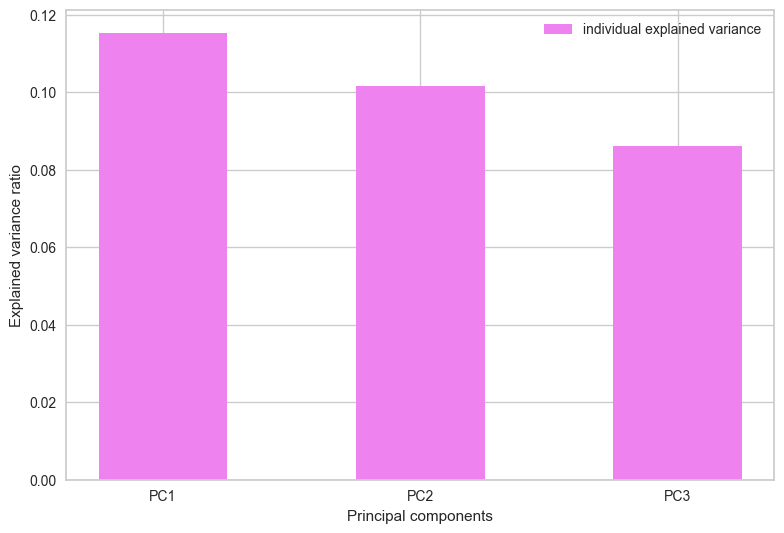

In [ ]:
from matplotlib import pyplot as plt

plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [109]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=ds.columns)
loading_matrix

,PC1,PC2,PC3
type,0.244861,0.563477,0.112087
release_year,-0.069010,0.688068,0.303876
rating_category,-0.688339,-0.001752,0.118456
Action & Adventure,-0.242876,-0.385887,0.527868
Drama,-0.583669,0.143519,-0.288419
Horror,-0.133725,-0.189115,0.408723
Comedy,0.247943,-0.077627,-0.462426
Science Fiction & Fantasy,0.086030,-0.086313,0.495820
Family & Children,0.756160,-0.002538,-0.008981
Romance,-0.042212,0.273694,-0.425793


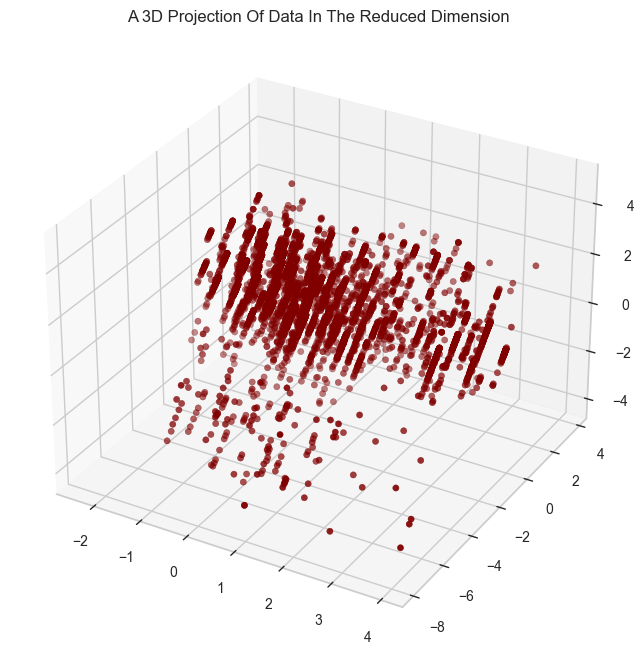

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

3. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


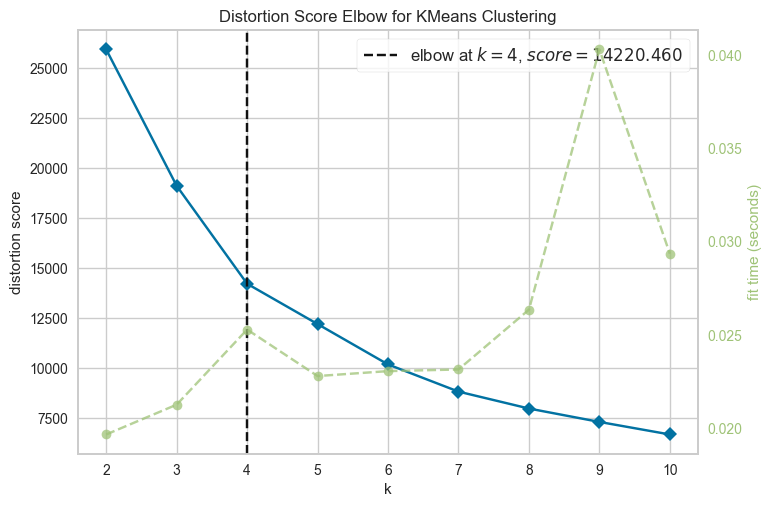

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [112]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(PCA_ds)
PCA_ds["Clusters"]= y_kmeans
df["Clusters"]= y_kmeans

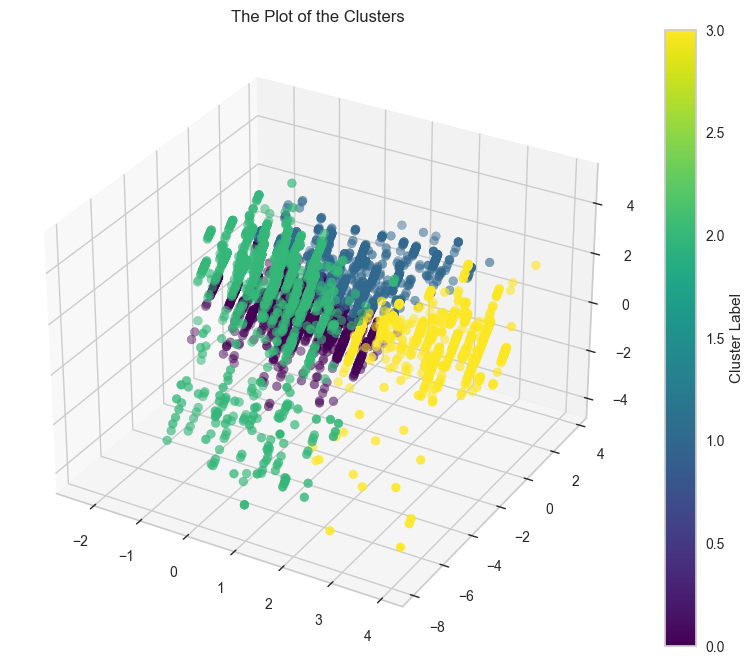

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

cmap = plt.get_cmap("viridis")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)

plt.colorbar(scatter, label="Cluster Label")

ax.set_title("The Plot of the Clusters")
plt.show()

C:\Users\Neil\AppData\Local\Temp\ipykernel_14668\1434342898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters"], palette= pal)


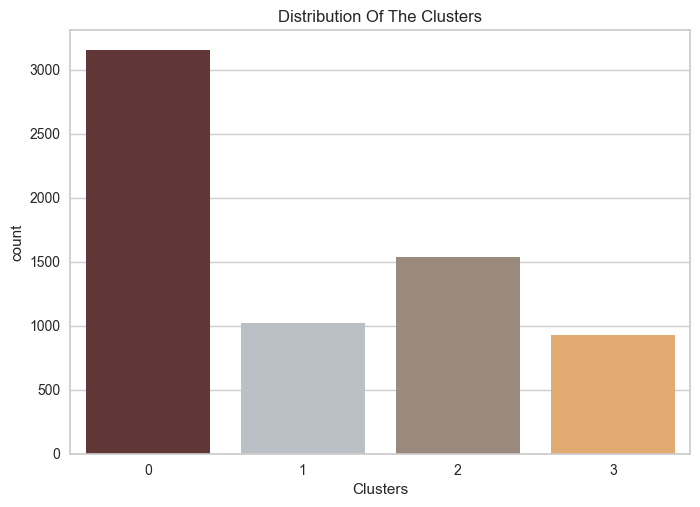

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

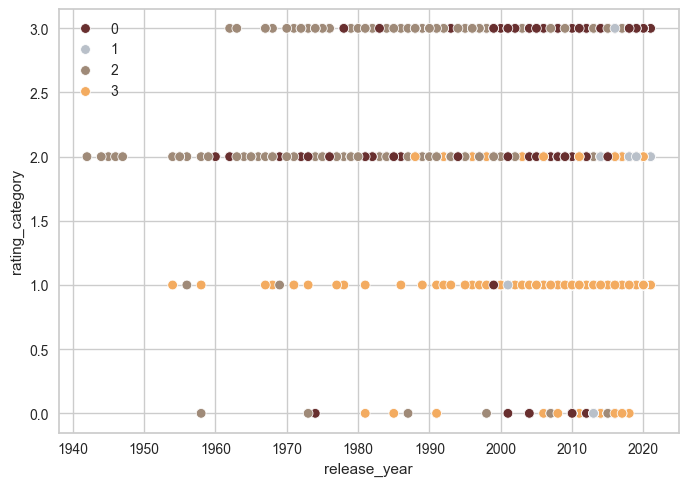

In [ ]:
pl = sns.scatterplot(data = df,x=df["rating_category"], y=df["rating_category"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

In [116]:
df

,type,release_year,rating_category,Action & Adventure,Drama,Horror,Comedy,Science Fiction & Fantasy,Family & Children,Romance,International Content,Documentary,Music & Performing Arts,Reality & Non-Fiction,Cult & Classic,Independent & Niche,Sports,Clusters
0,1,2020,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0,2016,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2011,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2
3,0,2009,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,2
4,0,2008,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,0,2018,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
7781,0,2006,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,3
7782,0,2005,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7783,0,2015,2,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


4. Profile each cluster that you have generated based on your experiments

<Figure size 800x550 with 0 Axes>

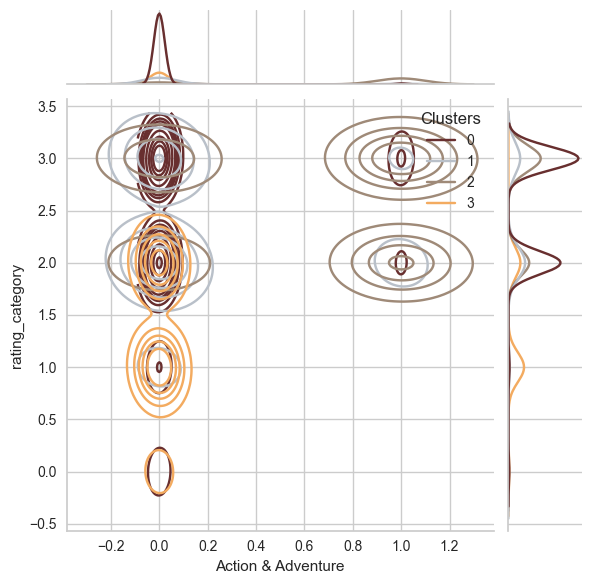

<Figure size 800x550 with 0 Axes>

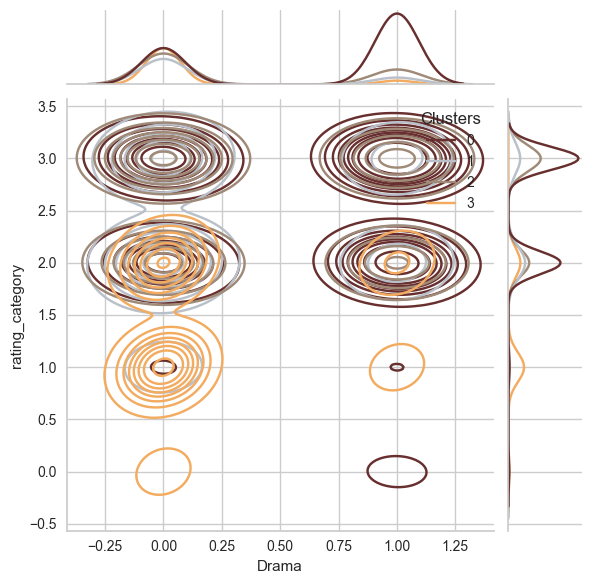

<Figure size 800x550 with 0 Axes>

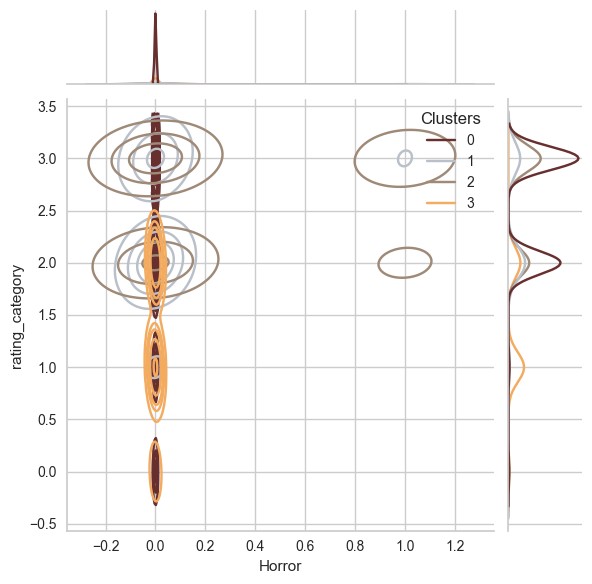

<Figure size 800x550 with 0 Axes>

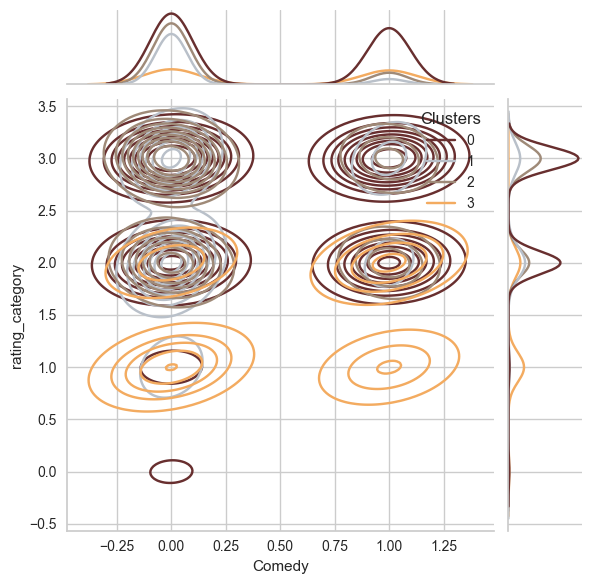

<Figure size 800x550 with 0 Axes>

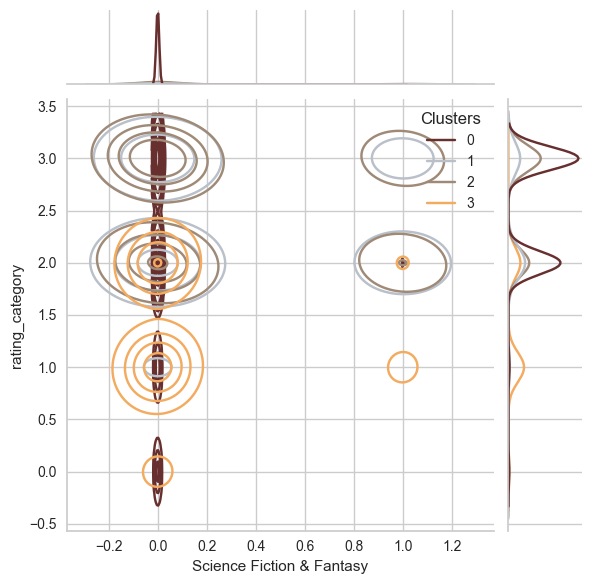

<Figure size 800x550 with 0 Axes>

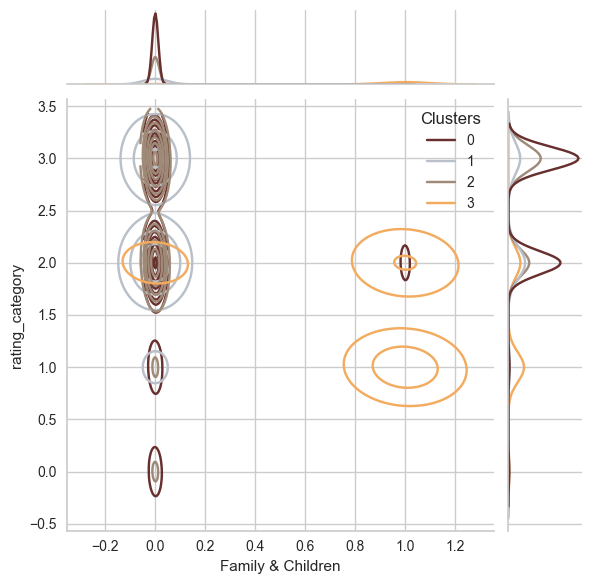

<Figure size 800x550 with 0 Axes>

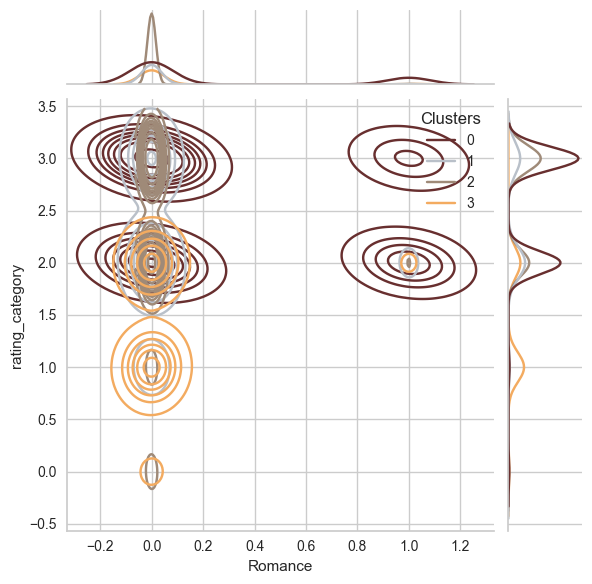

<Figure size 800x550 with 0 Axes>

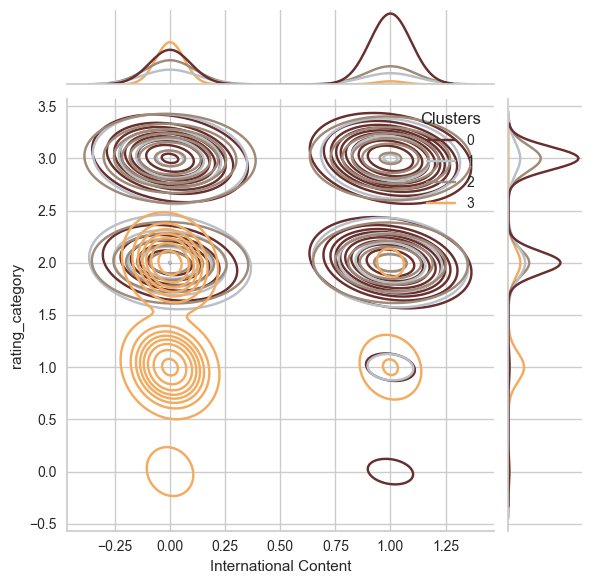

<Figure size 800x550 with 0 Axes>

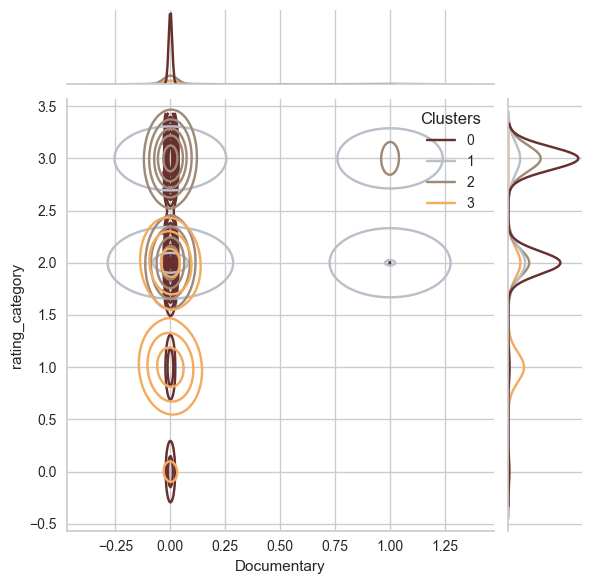

<Figure size 800x550 with 0 Axes>

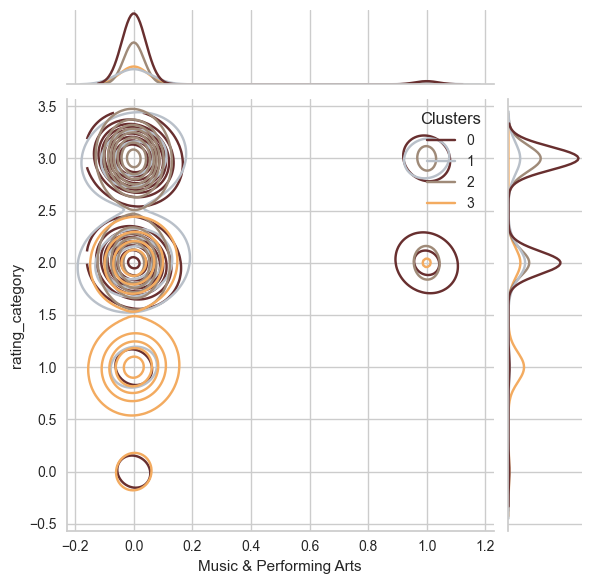

c:\Users\Neil\miniconda3\envs\COM222\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

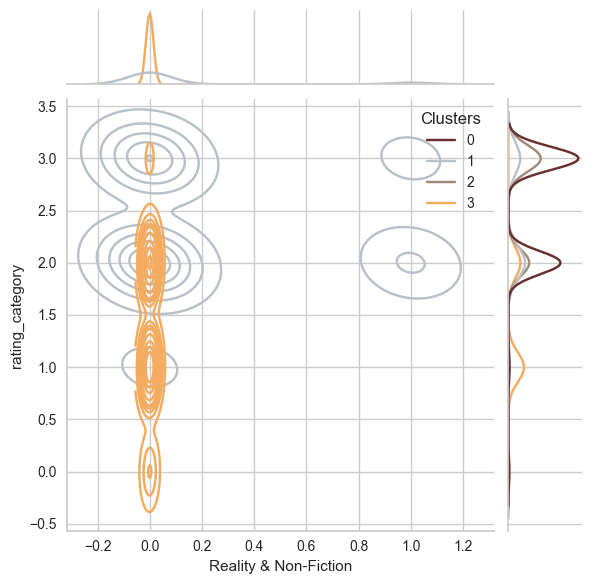

c:\Users\Neil\miniconda3\envs\COM222\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

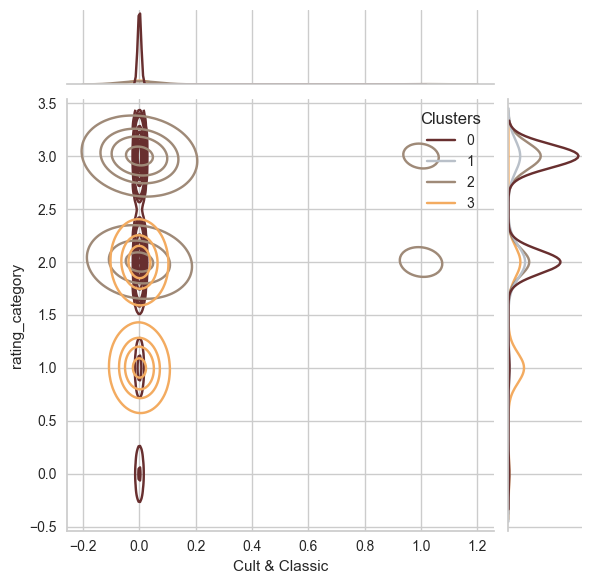

<Figure size 800x550 with 0 Axes>

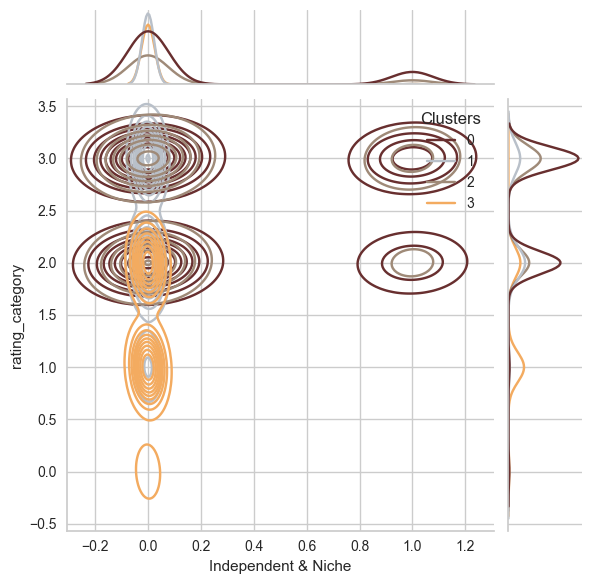

<Figure size 800x550 with 0 Axes>

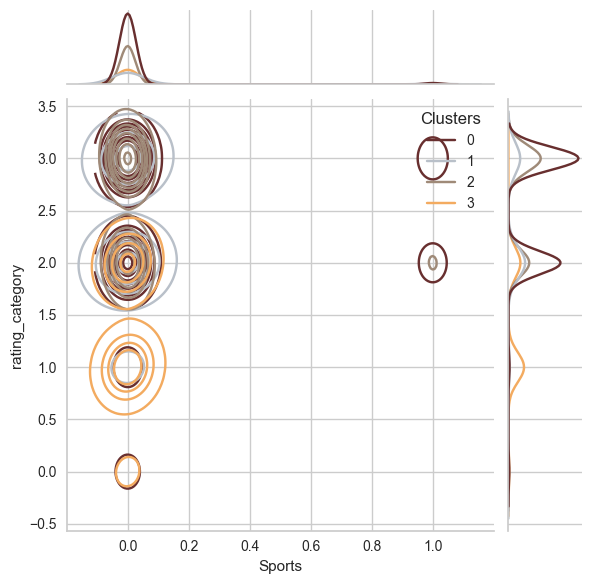

In [118]:
genres = ["Action & Adventure",
          "Drama",
          "Horror",
          "Comedy",
          "Science Fiction & Fantasy",
          "Family & Children",
          "Romance",
          "International Content",
          "Documentary",
          "Music & Performing Arts",
          "Reality & Non-Fiction",
          "Cult & Classic",
          "Independent & Niche",
          "Sports"]

for i in genres:
    plt.figure()
    sns.jointplot(x=df[i], y=df["rating_category"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

Tends to cluster movies with genres like:

- Cluster 0 - Entertainment (Drama, International Content, Romance, Sports, Independent & Niche)
- Cluster 1 - Educational/Reality (Reality & Non Fiction, Documentary, Music & Performance)
- Cluster 2 - Fictional (Action & Adventure, Horror, Science & Fantasy, Cult & Classic)
- Cluster 3 - Family-Friendly (Comedy, Family & Children)